<a href="https://colab.research.google.com/github/Daffaaq/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : Daffa Aqila Rahmatullah

NIM : 2041720098

Kelas TI 3G

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


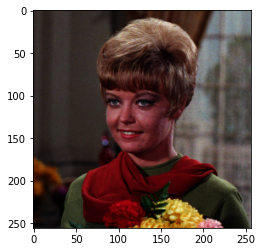

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

# Tugas Praktikum

## Nomer 1

Gamma Correction Pada Citra
Masukkan Nilai Gamma : 3


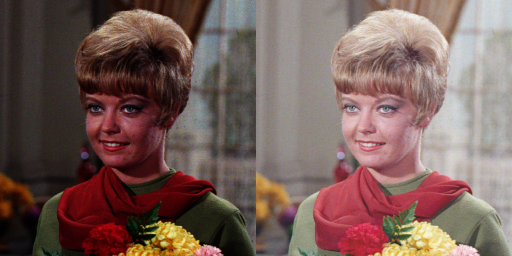

In [3]:
print('Gamma Correction Pada Citra')
print('===========================')
try :
  gamma = int(input('Masukkan Nilai Gamma : '))
except ValueError:
  print('Error, not a number');

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#Melakukan Akses Per Piksel dengan 3 Looping

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)  

## Nomer 2

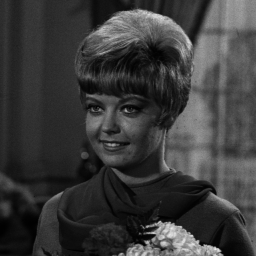

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

 Bit Depth Pada Citra 


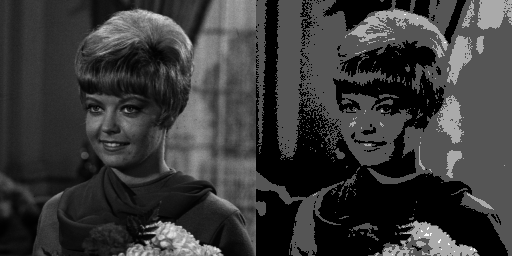

In [5]:
print(' Bit Depth Pada Citra ')
print('======================')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);
depth_image = np.zeros(original.shape, original.dtype) 
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Bit Depth Pada Citra 


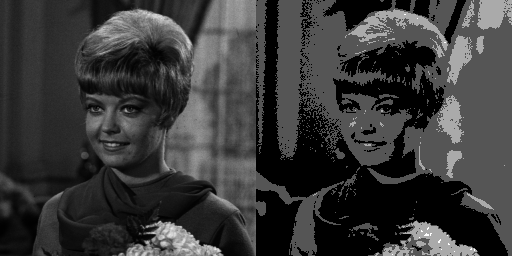

In [33]:
print(' Bit Depth Pada Citra ')
print('======================')
bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 
original2 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/female.tiff', cv.IMREAD_GRAYSCALE) 
depth_image = np.zeros(original2.shape, original2.dtype)
 
depth_image = np.array(np.round((original2/level))*level, dtype='uint8')

final_frame2 = cv.hconcat((original2, depth_image))
cv2_imshow(final_frame2)

## Nomer 3

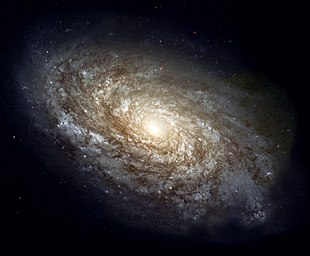

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
original= cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

Nilai PSNR adalah 19.514681682415013 (dB)


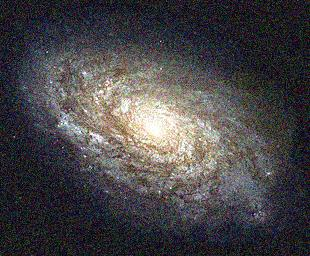

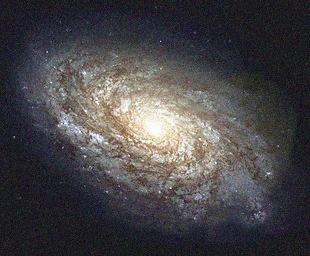

In [37]:
import glob
def PSNR(original, img2): 
    mse = np.mean((original - img2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 5
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)

print('Nilai PSNR adalah',psnr,'(dB)')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Nilai PSNR adalah 19.869346860548276 (dB)


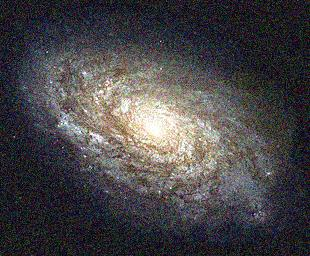

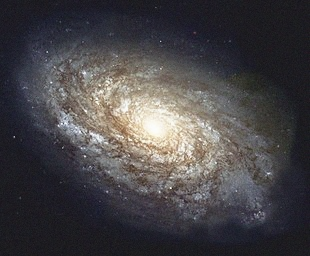

In [38]:
import glob
def PSNR(original, img2): 
    mse = np.mean((original - img2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 30
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)

print('Nilai PSNR adalah',psnr,'(dB)')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Nilai PSNR adalah 19.90634546791904 (dB)


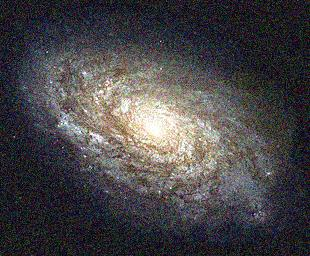

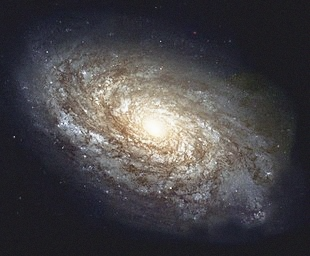

In [39]:
import glob
def PSNR(original, img2): 
    mse = np.mean((original - img2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 60
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)

print('Nilai PSNR adalah',psnr,'(dB)')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Nilai PSNR adalah 19.915645515893235 (dB)


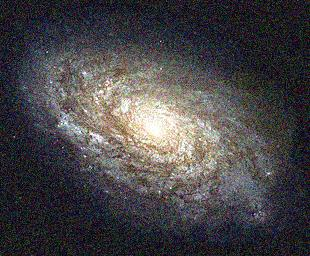

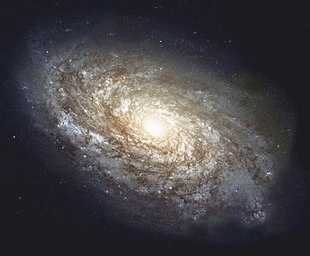

In [40]:
import glob
def PSNR(original, img2): 
    mse = np.mean((original - img2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 80
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)

print('Nilai PSNR adalah',psnr,'(dB)')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Nilai PSNR adalah 19.92196095594035 (dB)


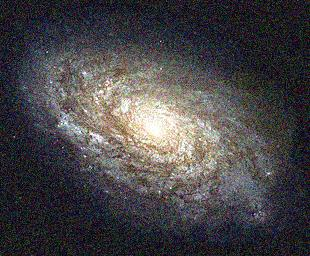

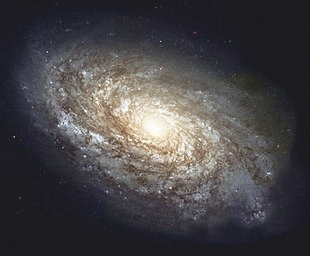

In [41]:
import glob
def PSNR(original, img2): 
    mse = np.mean((original - img2) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 100
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)

print('Nilai PSNR adalah',psnr,'(dB)')
cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah

Semakin besar nilai PSNR maka akan semakin bagus. Kebalikannya, jika nilai PSNR semakin kecil maka hasilnya semakin buruk pada tampilan citranya.

## Nomer 4

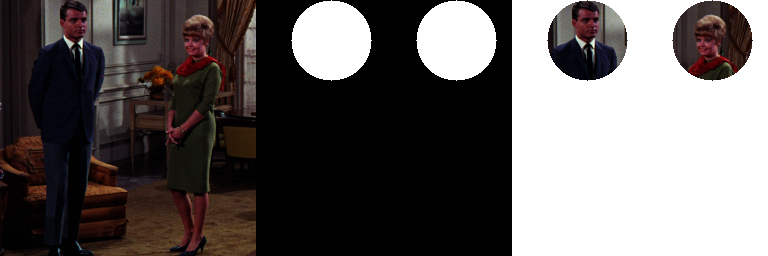

In [35]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

original41 = ~ img4

result_AND = ~ (mask & original41)

final_frame = cv.hconcat((img4, mask, result_AND))
cv2_imshow(final_frame)

## Nomer 5

### OR

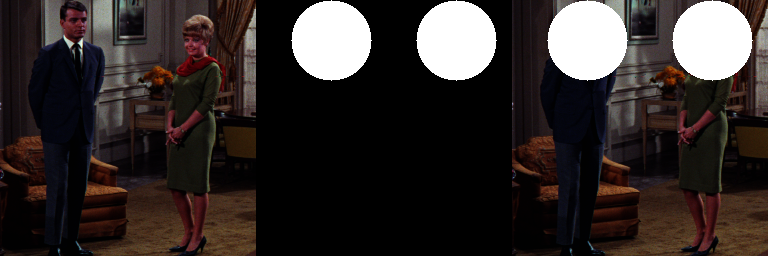

In [29]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 | mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 | mask1

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### NOT

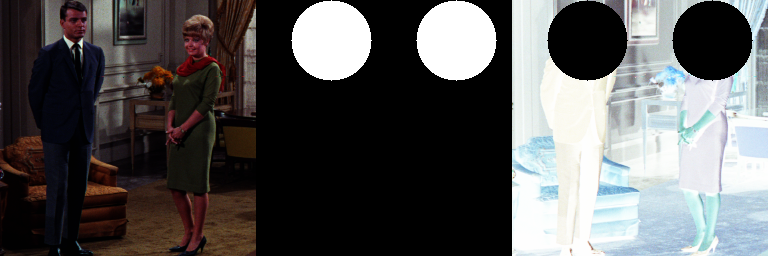

In [30]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~img4 & ~mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### NAND

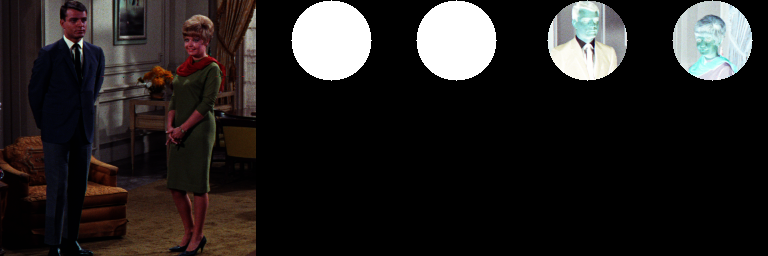

In [31]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = ~img4 & mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = ~img4 & mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### XOR

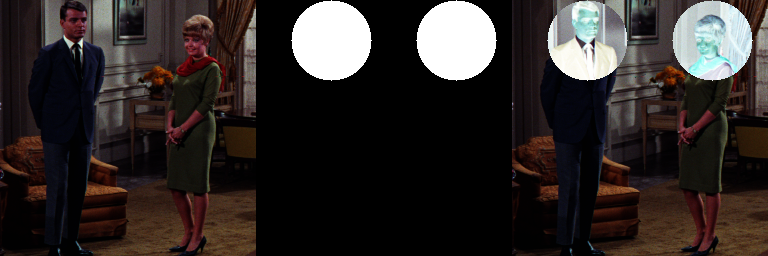

In [32]:
img4 = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/couple.tiff')

mask = np.zeros(img4.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255,255,255), -1)

result = img4 ^ mask

mask1 = cv.circle(mask, (200, 40), 40, (255,255,255), -1)

result = img4 ^ mask

final_frame = cv.hconcat((img4, mask, result))
cv2_imshow(final_frame)

### Tuliskan hasil analisa anda:

Operator logika pada pengolahan citra digunakan untuk melakukan modifikasi citra dengan cara menggabungkan atau memisahkan informasi dari pixel pixel citra.



*   OR akan menambahkan mask di citra
*   NOT akan membuat citra menjadi negative

*   NAND akan menambahkan mask dan membuat citra menjadi negative
*   XOR akan menambahkan mask di gambar couple dan membuat objek di dalam mask menjadi negative



